In [1]:
from aaa import *

In [2]:
from qutip import *

In [3]:
import mpmath as mp
import matplotlib.pyplot as plt
from qutip import *

In [346]:
def bose(w,beta):
    if w==0:
        return 0
    else:
        return 1/(np.exp(beta*w)-1)
def correlation_function(t,alpha=0.005,wc=2,s=1):
    return np.array(2*alpha*mp.gamma(s+1)*(wc)**(s+1) *(1+1j*wc*t)**(-(s+1)),dtype=np.complex128)
def power_spectrum(w,alpha=0.005,wc=2,s=1):
    return np.array(2*(bose(1,1e20)+1)*alpha *(wc)**(1-s) * w**s *np.exp(-abs(w)/wc) ,dtype=np.complex128)

In [192]:
t=np.linspace(0,5,500)
C=correlation_function(t)

In [193]:
Hsys=sigmaz()/2
Q=sigmax()

In [194]:
fc=heom.CorrelationFitter(Q)

In [195]:
bath,fitinfo=fc.get_fit(t,C,Ni=4,Nr=4)

In [196]:
fc.summary()

Fit correlation class instance: 
 

Result of fitting The Real Part Of                                      |Result of fitting The Imaginary Part                                    
 the Correlation Function with 4 terms:                                 | Of the Correlation Function with 4 terms:                              
                                                                        |                                                                        
 Parameters|   lam    |  gamma   |   w0                                 | Parameters|   lam    |  gamma   |   w0                                 
 1         |-1.34e-02 |-1.29e+00 |2.18e-03                              | 1         |-3.80e-02 |-2.90e+00 |3.56e+00                              
 2         |-5.63e-02 |-9.28e+00 |5.67e+00                              | 2         |-1.29e-01 |-4.87e+00 |2.21e-14                              
 3         | 1.12e-01 |-4.90e+00 |1.07e+00                              | 3         |-1.

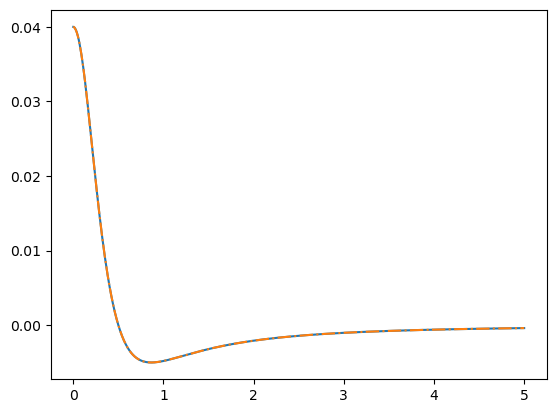

In [197]:
plt.plot(t,np.real(C))
plt.plot(t,np.real(fc.fitted_correlation(t)),'-.')

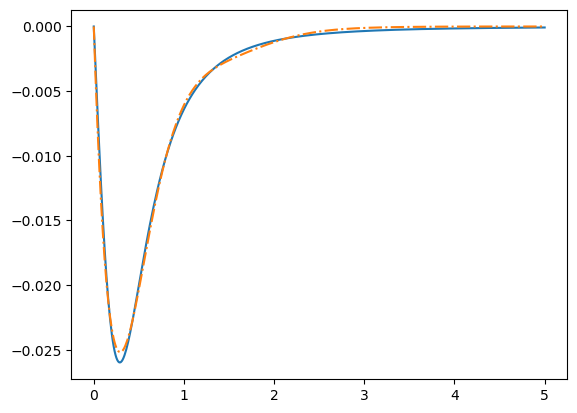

In [198]:
plt.plot(t,np.imag(C))
plt.plot(t,np.imag(fc.fitted_correlation(t)),'-.')

In [347]:
Z=np.concatenate((-np.logspace(2,-8,5000),np.logspace(-8,2,5000)))+0j
Z#=np.linspace(-30,30,2000)+0j
r,pol,res,zer=aaa(power_spectrum,Z,tol=1e-6)

/tmp/ipykernel_121141/704684123.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp(beta*w)-1)


In [348]:
len(pol)

36

In [349]:
def spectrum_from_paper(w,pol,res):
    # terms=[]
    # result=[]
    # for j in w:
    #     for i in range(len(pol)):
    #         terms.append(res[i]/(j-pol[i]) +     np.conjugate(res[i]/(j-pol[i])))
    #     result.append(np.sum(terms))
    # return result
    rr=[]
    for j in w:
        CC=sum([np.real(res[i]/(j-pol[i])) for i in range(len(pol))])
        rr.append(CC)
    return rr

/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/mcditoos/aaa.py:55: RuntimeWarning: divide by zero encountered in divide
  CC = 1 / (np.subtract.outer(zv, z))
/home/mcditoos/aaa.py:55: RuntimeWarning: invalid value encountered in divide
  CC = 1 / (np.subtract.outer(zv, z))
/home/mcditoos/aaa.py:58: RuntimeWarning: invalid value encountered in divide
  r = np.dot(CC, w * f) / np.dot(CC, w)
/tmp/ipykernel_121141/704684123.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp(beta*w)-1)


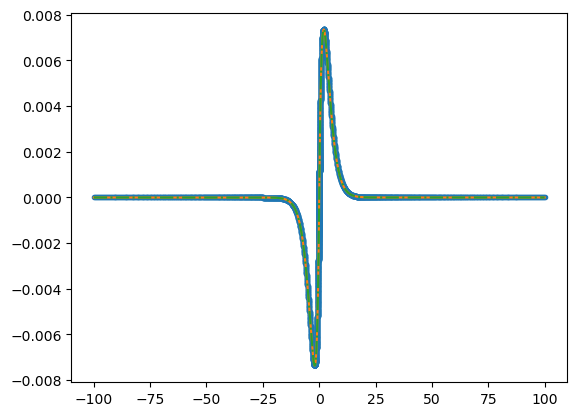

In [350]:
plt.plot(Z,spectrum_from_paper(Z,pol,res),'.')
plt.plot(Z,r(Z))
plt.plot(Z,power_spectrum(Z),'-.')

In [351]:
def filter_poles(pol,res):
    pols=[]
    ress=[]
    ress2=[]
    for i in range(len(pol)):
        if (np.imag(pol[i])<0):
            pols.append(pol[i])
            ress.append(res[i])
        else:
            ress2.append(res[i])
    return np.array(pols),np.array(ress),np.array(ress2)

In [352]:
new_pols,new_res,res2=filter_poles(pol,res)
ckAR,ckAI=np.real(-1j*new_res),np.imag(-1j*new_res)
vkAR,vkAI=np.real(1j*new_pols),np.imag(1j*new_pols)
ckAR2,ckAI2=np.real(-1j*res2),np.imag(-1j*res2)


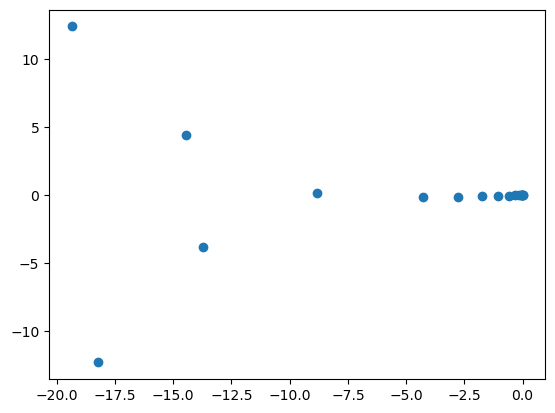

In [353]:
plt.scatter(np.imag(new_pols),np.real(new_pols))

In [354]:
def correlation_from_exponents(ck,vk,t):
    c=0
    for i in range(len(ck)):
        c+=(ck[i])*np.exp(-vk[i]*t)
    return c

In [355]:
cc=[(ckAR[i]+1j*ckAI[i])* np.exp(-(vkAR[i]+1j*vkAI[i]) * t) for i in range(len(ckAR))]

/tmp/ipykernel_121141/704684123.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp(beta*w)-1)


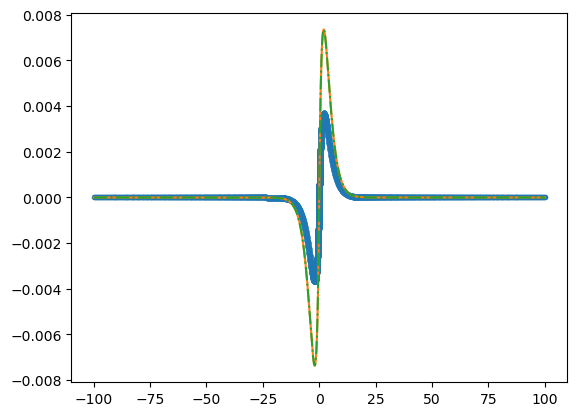

In [356]:
plt.plot(Z,np.array(spectrum_from_paper(Z,new_pols,new_res)),'.') # after filter is over 2
plt.plot(Z,r(Z))
plt.plot(Z,power_spectrum(Z),'-.')

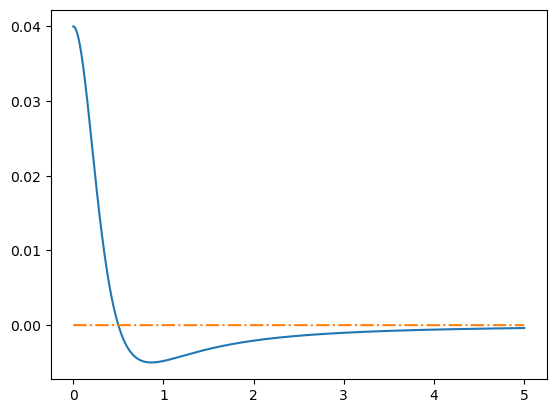

In [357]:
plt.plot(t,np.real(C))
plt.plot(t,np.real(correlation_from_exponents(ckAR+1j*ckAI,vkAR+1j*vkAI,t))*np.pi,'-.')
# plt.plot(t,np.real(sum(cc)))
# plt.plot(t,np.imag(sum(cc)))

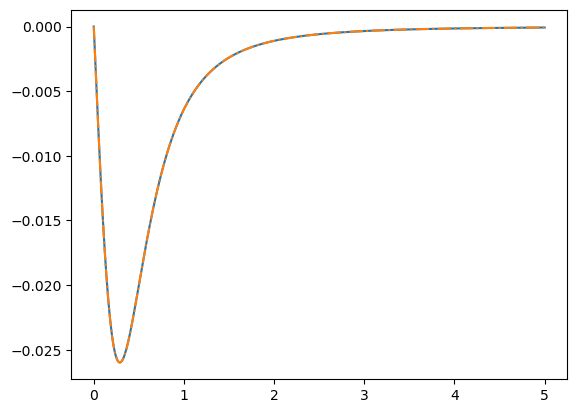

In [358]:
plt.plot(t,np.imag(C))
plt.plot(t,np.imag(correlation_from_exponents(ckAR+1j*ckAI,vkAR+1j*vkAI,t))*np.pi,'-.')

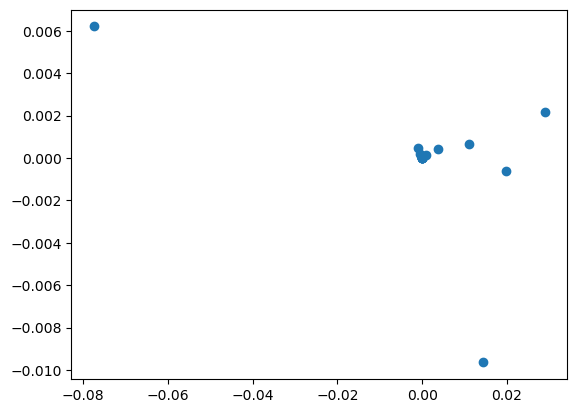

In [260]:
plt.scatter(np.real(new_res),np.imag(new_res))

In [116]:
rho0=Qobj([[1,0],[0,0]])

In [117]:
tlist=np.linspace(0,1000,1000)

In [118]:
options = {'nsteps':15000, 'store_states':True, 'rtol':1e-12, 'atol':1e-12, 'method':"bdf"}
HEOM1= heom.HEOMSolver(Hsys, bath, max_depth=3,options=options)# you can use three or 4 and it will work the same Marek :)
heom1=HEOM1.run(rho0,tlist)

10.0%. Run time:   3.86s. Est. time left: 00:00:00:34
20.0%. Run time:   7.51s. Est. time left: 00:00:00:30
30.0%. Run time:  10.96s. Est. time left: 00:00:00:25
40.0%. Run time:  14.47s. Est. time left: 00:00:00:21
50.1%. Run time:  18.04s. Est. time left: 00:00:00:18
60.1%. Run time:  21.56s. Est. time left: 00:00:00:14
70.1%. Run time:  25.03s. Est. time left: 00:00:00:10
80.1%. Run time:  28.58s. Est. time left: 00:00:00:07
90.1%. Run time:  32.26s. Est. time left: 00:00:00:03
100.0%. Run time:  36.04s. Est. time left: 00:00:00:00
Total run time:  36.04s


In [213]:
aaaBath=heom.BosonicBath(sigmax(),ckAR,vkAR+1j*vkAI,ckAI,vkAR+1j*vkAI)
HeOM_aaa = heom.HEOMSolver(Hsys, aaaBath, max_depth=3,options=options)
result_aaa=HeOM_aaa.run(rho0,tlist)

10.0%. Run time:   2.69s. Est. time left: 00:00:00:24
20.0%. Run time:   5.52s. Est. time left: 00:00:00:22
30.0%. Run time:   8.25s. Est. time left: 00:00:00:19
40.0%. Run time:  11.30s. Est. time left: 00:00:00:16
50.1%. Run time:  14.40s. Est. time left: 00:00:00:14
60.1%. Run time:  17.34s. Est. time left: 00:00:00:11
70.1%. Run time:  20.12s. Est. time left: 00:00:00:08
80.1%. Run time:  23.09s. Est. time left: 00:00:00:05
90.1%. Run time:  26.13s. Est. time left: 00:00:00:02
100.0%. Run time:  28.92s. Est. time left: 00:00:00:00
Total run time:  28.92s


In [214]:
# HEOM2= heom.HEOMSolver(Hsys, fc, max_depth=4)# you can use three or 4 and it will work the same Marek :)
# heom2=HEOM2.run(rho0,tlist)

In [215]:
# HEOM3= heom.HEOMSolver(Hsys, fc, max_depth=5)# you can use three or 4 and it will work the same Marek :)
# heom3=HEOM3.run(rho0,tlist)

In [216]:
def projection(result,i,j):
    try:
        return np.array([result.states[k][i,j] for k in range(len(result.states))])
    except:
        return np.array([result[k][i,j] for k in range(len(result))])

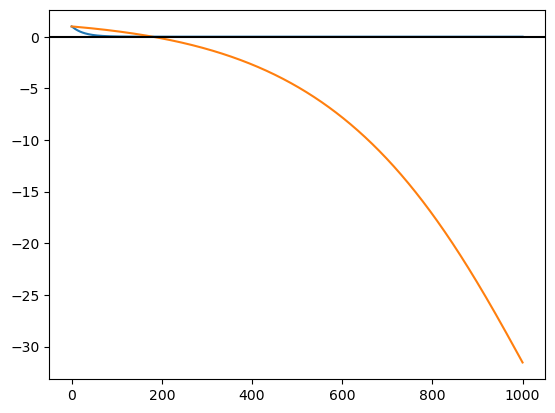

In [281]:
plt.plot(tlist,np.real(projection(heom1,0,0)))
plt.plot(tlist,np.real(projection(result_aaa,0,0)))

plt.axhline(y=0,color='k')

# Fitting on the positive space will give me a match on the real part ?

In [293]:
Z=np.logspace(-10,2,3000)+0j
r,pol,res,zer=aaa(power_spectrum,Z,tol=1e-13)

In [294]:
new_pols,new_res,res2=filter_poles(pol,res)
ckAR,ckAI=np.real(-1j*new_res),np.imag(-1j*new_res)
vkAR,vkAI=np.real(1j*new_pols),np.imag(1j*new_pols)
ckAR2,ckAI2=np.real(-1j*res2),np.imag(-1j*res2)

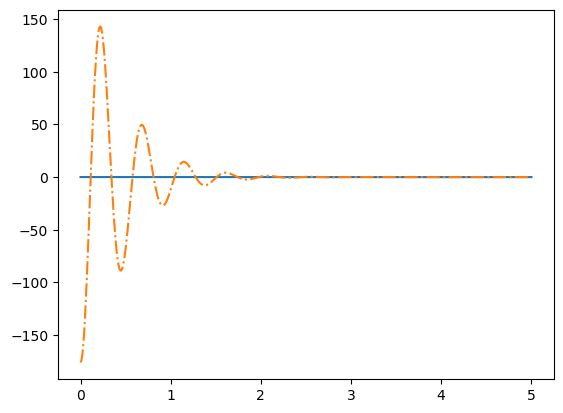

In [295]:
plt.plot(t,np.real(C))
plt.plot(t,np.real(correlation_from_exponents(ckAR+1j*ckAI,vkAR+1j*vkAI,t))*np.pi,'-.')
# plt.plot(t,np.real(sum(cc)))

In [4]:
from qutip import *

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
bath=solver.heom.DrudeLorentzBath( Q=sigmax(), lam=0.05, T=2, Nk=100, gamma=0.1)
#bath=solver.heom.UnderDampedBath( Q=sigmax(),w0=1, lam=0.05, T=1, Nk=15, gamma=0.5)

In [8]:
bath.correlation_function(21,limit=1e4,epsrel=1e-12,epsabs=1e-12,error=True)

/home/mcditoos/qutip_gsoc_app/qutip/solver/heom/bofin_baths.py:396: RuntimeWarning: overflow encountered in exp
  return (1 / (np.exp(w / self.T) - 1))


((0.025805526215850468+0.007070006095928209j), 0.19140131751147407)

In [6]:
bath.correlation_function_approx(21)

(0.024486183086808555-0.0006122821412649096j)

In [62]:
np.isclose(bath.correlation_function_approx(21),bath.correlation_function(21),rtol=1e-3).all()

False

In [63]:
bath.spectral_density(4)

0.00249843847595253

In [64]:
bath.spectral_density_approx(4)

0.0024962591765246124

In [65]:
np.isclose(bath.spectral_density_approx(4),bath.spectral_density(4),rtol=1e-2)

True

In [66]:
t=np.linspace(0,10,100)

In [67]:
C=bath.correlation_function(t,limit=1e5)

In [68]:
def c_i2(w, t): 
        if w==1:
                return 0
        return (1/(np.pi*w**2))*bath.spectral_density((1/w )-1)*(
        (2*bath._bose_einstein((1/w) -1)+1)*np.cos(((1/w) -1)*t) - 1j*np.sin(((1/w) -1)*t))
def c_i(w, t): 
        return (1/(np.pi))*bath.spectral_density(w)*(
        mp.coth(w/4)*mp.cos(w*t) - 1j*mp.sin(w*t))
def c_i3(w, t): 
        return (1/(np.pi))*bath.spectral_density(w)*(
        (2*bath._bose_einstein(w)+1)*np.cos(w*t) - 1j*np.sin(w*t))

In [69]:
from scipy.integrate import quad,quadrature,fixed_quad,quad_vec,romberg,qmc_quad

In [70]:
from mpmath import quadosc,quadsubdiv
import mpmath as mp

In [71]:
quad_vec(lambda w: c_i3(w,1),0,np.inf,quadrature='gk21',epsabs=0,epsrel=1e-12,limit=1e6)

((0.18094947123523025-0.004356561091501209j), 1.0401561070312453)

In [72]:
quadosc(lambda w: c_i(w,1),[0,np.inf],zeros=lambda n: 4*(np.pi/2 + 2 *np.pi *n)/(1j+4*1))

mpc(real='0.18092979157852809', imag='-0.0045241870896421919')

In [73]:
quadsubdiv(lambda w: c_i(w,1),[0,np.inf])

mpc(real='0.17882038261381605', imag='-0.0046851184362098688')

In [74]:
mp.quad(lambda w: c_i(w,1),[0,np.inf])

mpc(real='0.17817240361728359', imag='-0.0023895796040909563')

/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


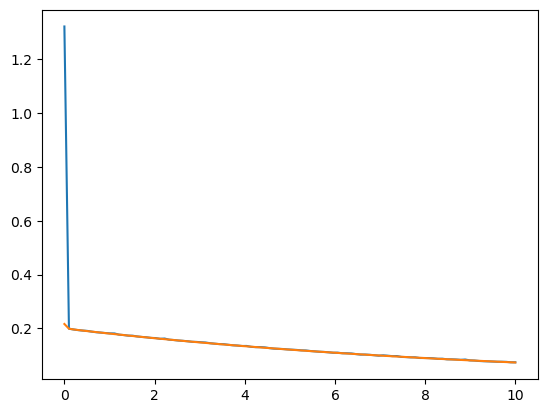

In [75]:
plt.plot(t,C)
plt.plot(t,bath.correlation_function_approx(t))

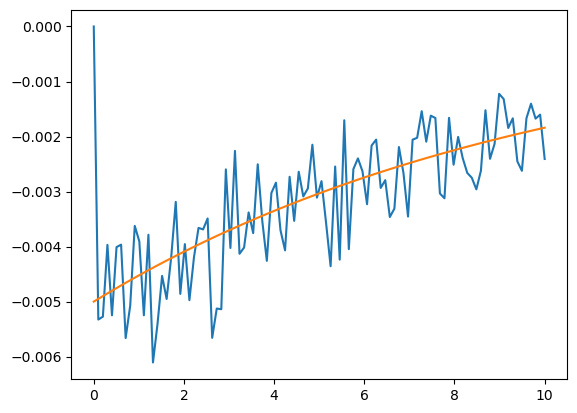

In [76]:
plt.plot(t,np.imag(C))
plt.plot(t,np.imag(bath.correlation_function_approx(t)))